In [1]:
import module as mod
import loss
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

dataFULL = pd.read_csv('../data/lexique/Lexique383.tsv', sep='\t', encoding='utf-8')

dataFULL

,ortho,phon,lemme,cgram,genre,nombre,freqlemfilms2,freqlemlivres,freqfilms2,freqlivres,...,orthrenv,phonrenv,orthosyll,cgramortho,deflem,defobs,old20,pld20,morphoder,nbmorph
0,a,a,a,NOM,m,NaN,81.36,58.65,81.36,58.65,...,a,a,a,"NOM,AUX,VER",NaN,NaN,1.00,1.00,a,1
1,a,a,avoir,AUX,NaN,NaN,18559.22,12800.81,6350.91,2926.69,...,a,a,a,"NOM,AUX,VER",NaN,NaN,1.00,1.00,avoir,1
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,...,a,a,a,"NOM,AUX,VER",93.0,16.0,1.00,1.00,avoir,1
3,a capella,akapEla,a capella,ADV,NaN,NaN,0.04,0.07,0.04,0.07,...,allepac a,alEpaka,a ca-pel-la,ADV,NaN,NaN,3.85,2.85,a-capella,2
4,a cappella,akapEla,a cappella,ADV,NaN,NaN,0.04,0.07,0.04,0.07,...,alleppac a,alEpaka,a cap-pel-la,ADV,NaN,NaN,4.60,2.85,a-cappella,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142689,ôtée,ote,ôté,ADJ,f,s,0.23,0.61,0.10,0.27,...,eétô,eto,ô-tée,"VER,ADJ",NaN,NaN,1.80,1.00,ôté,1
142690,ôtées,ote,ôter,VER,f,p,16.81,42.03,0.16,0.07,...,seétô,eto,ô-tées,"VER,ADJ",89.0,28.0,1.85,1.00,ôter,1
142691,ôtées,ote,ôté,ADJ,f,p,0.23,0.61,0.01,0.07,...,seétô,eto,ô-tées,"VER,ADJ",NaN,NaN,1.85,1.00,ôté,1
142692,ôtés,ote,ôter,VER,m,p,16.81,42.03,0.04,0.14,...,sétô,eto,ô-tés,"VER,ADJ",89.0,28.0,1.65,1.00,ôter,1


In [2]:
data = dataFULL[['ortho', 'cgram', 'genre', 'nombre', 'nblettres', 'freqlivres']].copy()
data['ortho'] = data['ortho'].astype(str)
data

,ortho,cgram,genre,nombre,nblettres,freqlivres
0,a,NOM,m,NaN,1,58.65
1,a,AUX,NaN,NaN,1,2926.69
2,a,VER,NaN,NaN,1,1669.39
3,a capella,ADV,NaN,NaN,9,0.07
4,a cappella,ADV,NaN,NaN,10,0.07
...,...,...,...,...,...,...
142689,ôtée,ADJ,f,s,4,0.27
142690,ôtées,VER,f,p,5,0.07
142691,ôtées,ADJ,f,p,5,0.07
142692,ôtés,VER,m,p,4,0.14


In [3]:
quant = data['freqlivres'].quantile(0.62)
print(quant)
train_data = data[(data['nblettres'] == 5) & (data['freqlivres'] >= quant)]
train_data.sort_values(by='freqlivres', ascending=True)

0.41


,ortho,cgram,genre,nombre,nblettres,freqlivres
142671,ôtent,VER,NaN,NaN,5,0.41
18718,buées,NOM,f,p,5,0.41
81048,mates,VER,NaN,NaN,5,0.41
6055,angon,NOM,m,s,5,0.41
130416,tramé,VER,m,s,5,0.41
...,...,...,...,...,...,...
54981,faire,VER,NaN,NaN,5,1555.14
22501,cette,ADJ:dem,f,s,5,2320.68
11388,avait,AUX,NaN,NaN,5,3116.42
27118,comme,CON,NaN,NaN,5,3429.32


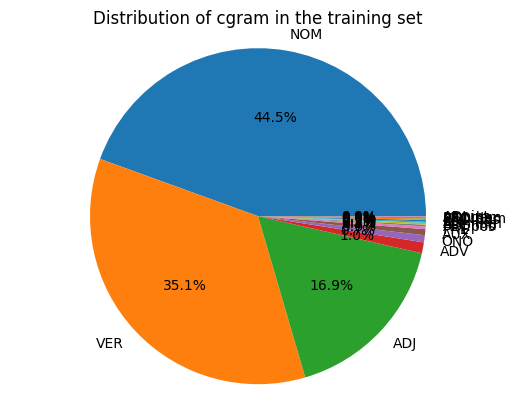

In [4]:
plt.pie(train_data['cgram'].value_counts(), labels=train_data['cgram'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of cgram in the training set')
plt.show()

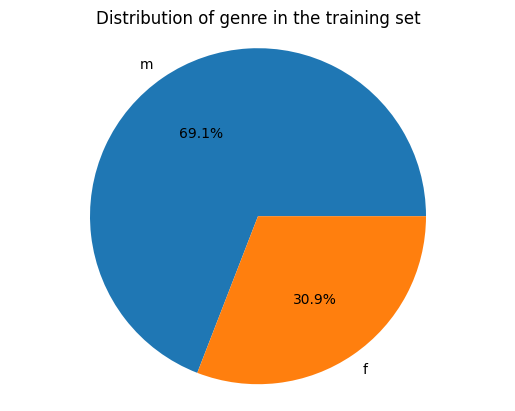

In [5]:
plt.pie(train_data['genre'].value_counts(), labels=train_data['genre'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of genre in the training set')
plt.show()

In [6]:
def get_alphabet(data):
    alphabet = set()
    for word in data['ortho']:
        for letter in word:
            alphabet.add(letter)
    return sorted(list(alphabet))

alphabet = get_alphabet(train_data)
print(alphabet)
print(len(alphabet))

["'", '-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'û']
39


In [7]:
def vectorize_word(word, alphabet):
    word_length = len(word)
    vocab_size = len(alphabet)
    vector = np.zeros((word_length, vocab_size), dtype=int)

    for i, letter in enumerate(word):
        if letter in alphabet:
            letter_index = alphabet.index(letter)
            vector[i, letter_index] = 1
        else:
            raise ValueError(f"Lettre inconnue : {letter}")
    
    return vector.flatten()


def vectorize_data(data, alphabet):
    vectors = []
    for word in data['ortho'].drop_duplicates():
        vectors.append(vectorize_word(word, alphabet))
    return np.array(vectors)

def get_word_from_vector(vector, alphabet):
    vocab_size = len(alphabet)
    word_length = vector.shape[0] // vocab_size

    word = ''
    for i in range(word_length):
        one_hot = vector[i * vocab_size:(i + 1) * vocab_size]
        if one_hot.sum() == 0:
            word += '?'
        else:
            letter_index = np.argmax(one_hot)
            word += alphabet[letter_index]
    return word


train_data = train_data.drop_duplicates(subset=['ortho'])
train_vectors = vectorize_data(train_data, alphabet)
train_data['vector'] = train_vectors.tolist()
# print(train_vectors[2])
print(train_data['ortho'].drop_duplicates().iloc[2])
print(get_word_from_vector(train_vectors[2], alphabet))

abcès
abcès


Epoch 100/1000, Loss: 0.0338
Validation Loss: 0.0403
Epoch 200/1000, Loss: 0.0242
Validation Loss: 0.0340
Epoch 300/1000, Loss: 0.0206
Validation Loss: 0.0332
Epoch 400/1000, Loss: 0.0174
Validation Loss: 0.0312
Epoch 500/1000, Loss: 0.0157
Validation Loss: 0.0333
Epoch 600/1000, Loss: 0.0132
Validation Loss: 0.0319
Epoch 700/1000, Loss: 0.0134
Validation Loss: 0.0298
Epoch 800/1000, Loss: 0.0133
Validation Loss: 0.0317
Epoch 900/1000, Loss: 0.0098
Validation Loss: 0.0350
Epoch 1000/1000, Loss: 0.0098
Validation Loss: 0.0328
Testing BinaryCrossEntropyLoss (Loss)
Test  BinaryCrossEntropyLoss (Loss): 0.0361
None


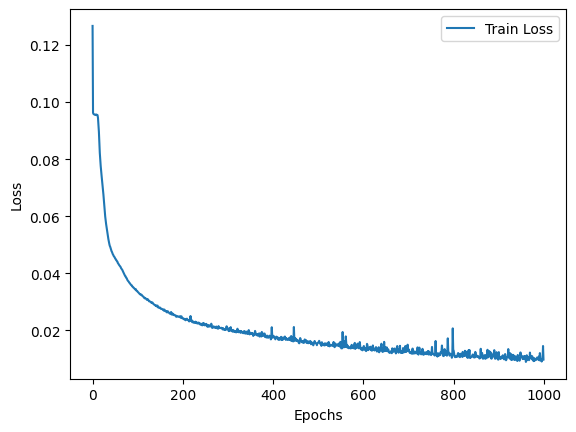

In [8]:
import importlib
import utils as ut
importlib.reload(mod)
importlib.reload(loss)
importlib.reload(ut)

encodeur = mod.Sequentiel(
    mod.Linear(len(alphabet) * 5, 50, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(50, 10, init=ml.xavier_init),
    mod.TanH()
)

decodeur = mod.Sequentiel(
    mod.Linear(10, 50, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(50, len(alphabet) * 5, init=ml.xavier_init),
    mod.Sigmoide()
)


autoencoder_classic = mod.Sequentiel(encodeur, decodeur)

train_dataset, val_dataset, test_dataset = ut.get_dataset_split(train_vectors, train_vectors, test_size=0.15, val_size=0.15, batch_size=16)
loss_function = loss.BinaryCrossEntropyLoss()
trainer = ut.Trainer(autoencoder_classic, loss_function, ut.Optimizer, train_dataset, val_dataset, test_dataset, epochs=1000, lr=0.035)


train_loss, _ = trainer.train(verbose=True, verbose_step=100, valid_epoch=100)
print(trainer.test([ut.LossMetric(loss_function)]))

plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
def encode_word(word, encodeur, alphabet):
    vector = vectorize_word(word, alphabet)
    vector = vector.reshape(1, -1)
    encoded_vector = encodeur.forward(vector)
    return encoded_vector


def encode_decode_word(word, autoencoder, alphabet):
    vector = vectorize_word(word, alphabet)
    vector = vector.reshape(1, -1)
    decoded_vector = autoencoder.forward(vector)
    decoded_word = get_word_from_vector(decoded_vector[0], alphabet)
    return decoded_word

# encode_decode_word('trucs', autoencoder_classic, alphabet)

In [10]:

train_data['encoded'] = train_data['ortho'].apply(lambda x: encode_word(x, encodeur, alphabet)).copy()

In [ ]:
from sklearn.manifold import TSNE


encoded_matrix = np.vstack(train_data['encoded'].values)

tsne_model = TSNE(n_components=2, random_state=41, perplexity=30, n_iter=1000)
tsne_result = tsne_model.fit_transform(encoded_matrix)

train_data['tsne-2d-one'] = tsne_result[:, 0]
train_data['tsne-2d-two'] = tsne_result[:, 1]



C:\Users\celva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


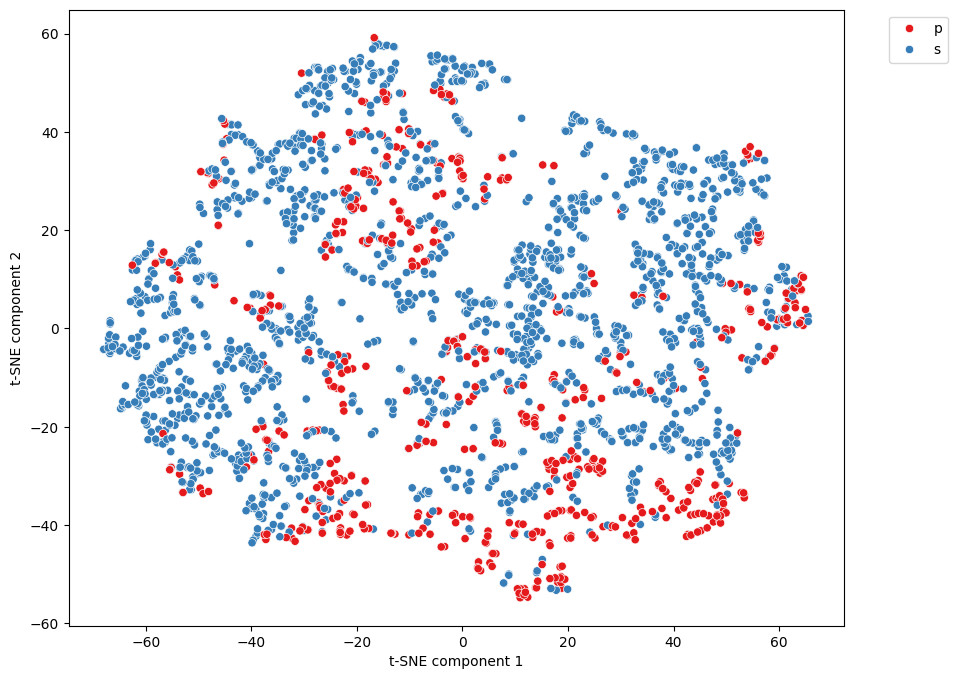

In [222]:

plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data, x='tsne-2d-one', y='tsne-2d-two', hue='nombre', palette='Set1')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\celva\AppData\Local\Temp\ipykernel_19680\1950695468.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_data[train_data['nombre'] == 'p'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')


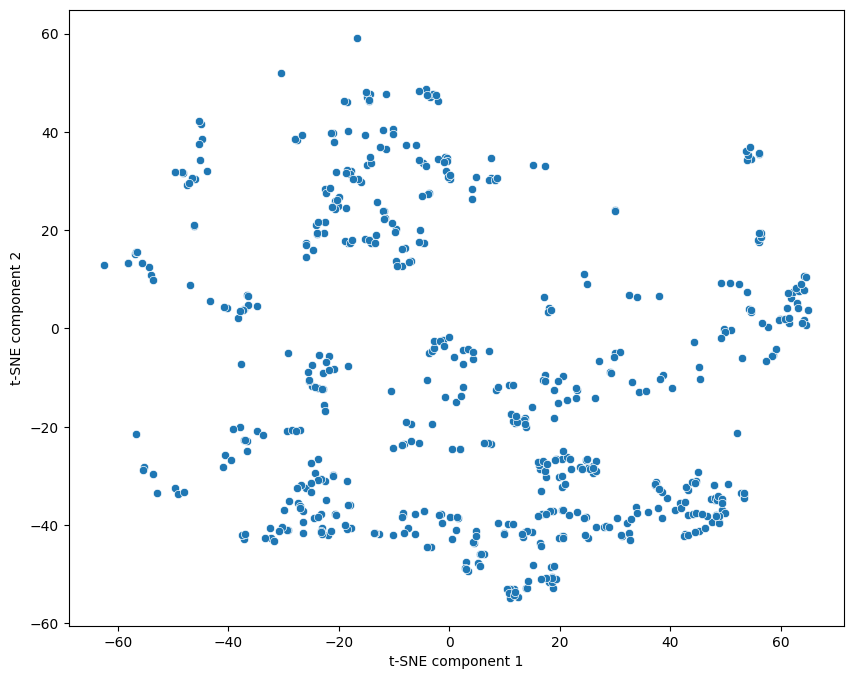

In [225]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data[train_data['nombre'] == 'p'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

C:\Users\celva\AppData\Local\Temp\ipykernel_19680\4251220979.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_data[train_data['nombre'] == 's'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')


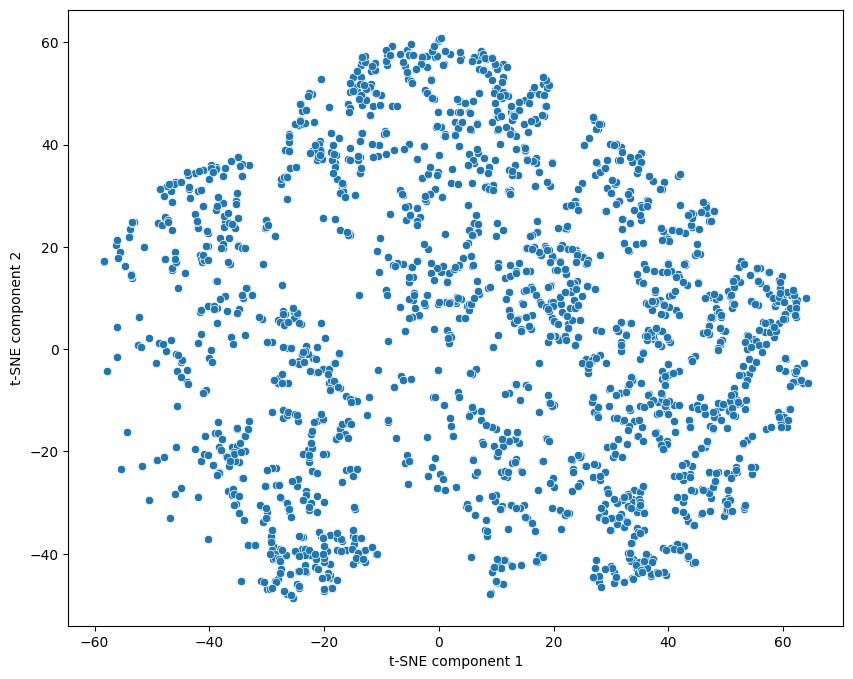

In [203]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data[train_data['nombre'] == 's'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

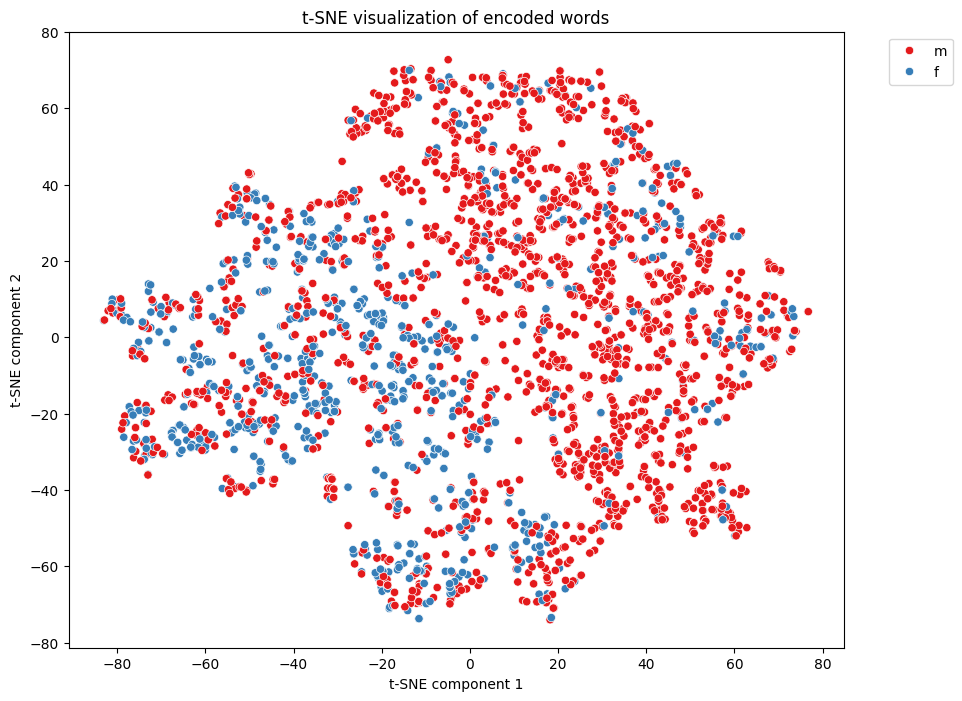

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data, x='tsne-2d-one', y='tsne-2d-two', hue='genre', palette='Set1')
plt.title('t-SNE visualization of encoded words')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\celva\AppData\Local\Temp\ipykernel_3256\623667777.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_data[train_data['genre'] == 'm'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')


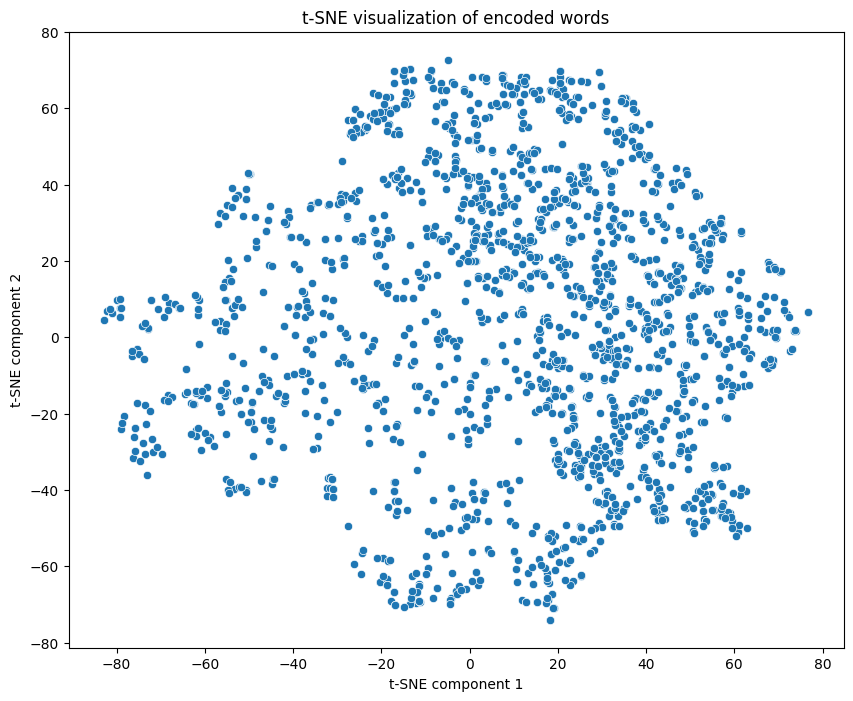

In [29]:

plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data[train_data['genre'] == 'm'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')
plt.title('t-SNE visualization of encoded words')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

C:\Users\celva\AppData\Local\Temp\ipykernel_3256\3834270717.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_data[train_data['genre'] == 'f'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')


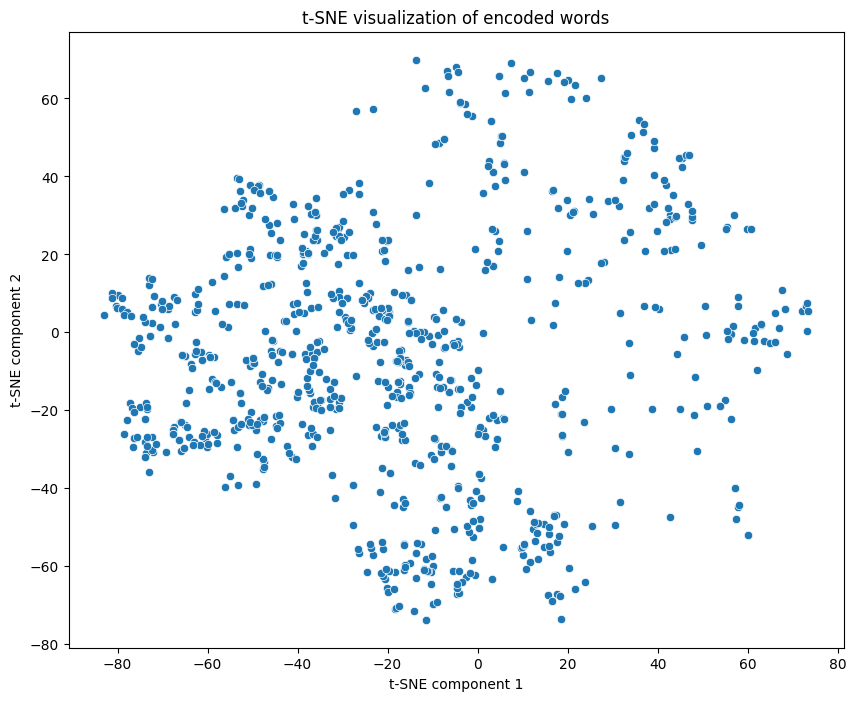

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data[train_data['genre'] == 'f'], x='tsne-2d-one', y='tsne-2d-two', palette='Set1')
plt.title('t-SNE visualization of encoded words')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

def predict_logreg(X, y):
    model = LogisticRegression(max_iter=1000, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1:.2f}")
    print(confusion_matrix(y_test, y_pred, normalize='true'))
    return model
    
train_data_genre = train_data[(train_data['genre'] == 'm') | (train_data['genre'] == 'f')]
train_data_genre = train_data_genre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre['vector'].values)
y = train_data_genre['genre'].values
y = np.where(y == 'm', 1, 0)
model = predict_logreg(X, y)
X = np.vstack(train_data_genre['encoded'].values)
model = predict_logreg(X, y)

Accuracy: 88.64%
F1 Score: 0.89
[[0.87179487 0.12820513]
 [0.10670732 0.89329268]]
Accuracy: 80.58%
F1 Score: 0.80
[[0.60897436 0.39102564]
 [0.10060976 0.89939024]]


In [12]:
masculine_with_e = np.vstack(train_data_genre[(train_data_genre['genre'] == 'm') & (train_data_genre['ortho'].str.endswith('e'))]['encoded'].values)
y_pred = model.predict(masculine_with_e)
accuracy = accuracy_score([1] * len(masculine_with_e), y_pred)
print(f"Accuracy for masculine words ending with 'e': {accuracy * 100:.2f}%")
feminine_without_e = np.vstack(train_data_genre[(train_data_genre['genre'] == 'f') & (~train_data_genre['ortho'].str.endswith('e'))]['encoded'].values)
y_pred = model.predict(feminine_without_e)
accuracy = accuracy_score([0] * len(feminine_without_e), y_pred)
print(f"Accuracy for feminine words not ending with 'e': {accuracy * 100:.2f}%")
obvious_gender = train_data_genre[((train_data_genre['genre'] == 'm') & (~train_data_genre['ortho'].str.endswith('e'))) | ((train_data_genre['genre'] == 'f') & (train_data_genre['ortho'].str.endswith('e')))].copy()
X_obvious = np.vstack(obvious_gender['encoded'].values)
y_pred = model.predict(X_obvious)
y_true = obvious_gender['genre'].values
y_true = np.where(y_true == 'm', 1, 0)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for obvious cases: {accuracy * 100:.2f}%")

Accuracy for masculine words ending with 'e': 35.57%
Accuracy for feminine words not ending with 'e': 9.00%
Accuracy for obvious cases: 90.24%


In [13]:
train_data_genre = train_data[(train_data['genre'] == 'm') | (train_data['genre'] == 'f')]
train_data_genre = train_data_genre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre['vector'].values)
y = train_data_genre['genre'].values
y = np.where(y == 'm', 1, 0)
model = predict_logreg(X, y)

masculine_with_e = np.vstack(train_data_genre[(train_data_genre['genre'] == 'm') & (train_data_genre['ortho'].str.endswith('e'))]['vector'].values)
y_pred = model.predict(masculine_with_e)
accuracy = accuracy_score([1] * len(masculine_with_e), y_pred)
print(f"Accuracy for masculine words ending with 'e': {accuracy * 100:.2f}%")
feminine_without_e = np.vstack(train_data_genre[(train_data_genre['genre'] == 'f') & (~train_data_genre['ortho'].str.endswith('e'))]['vector'].values)
y_pred = model.predict(feminine_without_e)
accuracy = accuracy_score([0] * len(feminine_without_e), y_pred)
print(f"Accuracy for feminine words not ending with 'e': {accuracy * 100:.2f}%")
obvious_gender = train_data_genre[((train_data_genre['genre'] == 'm') & (~train_data_genre['ortho'].str.endswith('e'))) | ((train_data_genre['genre'] == 'f') & (train_data_genre['ortho'].str.endswith('e')))].copy()
X_obvious = np.vstack(obvious_gender['vector'].values)
y_pred = model.predict(X_obvious)
y_true = obvious_gender['genre'].values
y_true = np.where(y_true == 'm', 1, 0)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for obvious cases: {accuracy * 100:.2f}%")

Accuracy: 88.64%
F1 Score: 0.89
[[0.87179487 0.12820513]
 [0.10670732 0.89329268]]
Accuracy for masculine words ending with 'e': 31.54%
Accuracy for feminine words not ending with 'e': 54.50%
Accuracy for obvious cases: 97.86%


In [14]:
train_data_nombre = train_data[(train_data['nombre'] == 'p') | (train_data['nombre'] == 's')]
train_data_nombre = train_data_nombre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_nombre['vector'].values)
y = train_data_nombre['nombre'].values
y = np.where(y == 'p', 1, 0)
model = predict_logreg(X, y)
X = np.vstack(train_data_nombre['encoded'].values)
model = predict_logreg(X, y)

Accuracy: 100.00%
F1 Score: 1.00
[[1. 0.]
 [0. 1.]]
Accuracy: 97.19%
F1 Score: 0.97
[[0.96833773 0.03166227]
 [0.01666667 0.98333333]]


In [15]:
difficult_words = train_data[((train_data['nombre'] == 's') & (train_data['ortho'].str.endswith('s'))) | ((train_data['nombre'] == 'p') & (~train_data['ortho'].str.endswith('s')))].copy()
difficult_words_x = np.vstack(difficult_words['encoded'].values)
difficult_words_y = difficult_words['nombre'].values
difficult_words_y = np.where(difficult_words_y == 'p', 1, 0)
y_pred = model.predict(difficult_words_x)
accuracy = accuracy_score(difficult_words_y, y_pred)
print(f"Accuracy for difficult words: {accuracy * 100:.2f}%")

Accuracy for difficult words: 10.00%


In [17]:
X = np.vstack(train_data_genre['vector'].values)
y = train_data_genre['genre'].values
y = np.where(y == 'm', 1, 0)
model = predict_logreg(X, y)

X_masc_with_e = vectorize_data(train_data_genre[(train_data_genre['genre'] == 'm') & (train_data_genre['ortho'].str.endswith('e'))], alphabet)
y_pred = model.predict(X_masc_with_e)
accuracy = accuracy_score([1] * len(X_masc_with_e), y_pred)
print(len(X_masc_with_e))
print(f"Accuracy for masculine words ending with 'e': {accuracy * 100:.2f}%")
X_fem_without_e = vectorize_data(train_data_genre[(train_data_genre['genre'] == 'f') & (~train_data_genre['ortho'].str.endswith('e'))], alphabet)
y_pred = model.predict(X_fem_without_e)
accuracy = accuracy_score([0] * len(X_fem_without_e), y_pred)
print(len(X_fem_without_e))
print(f"Accuracy for feminine words not ending with 'e': {accuracy * 100:.2f}%")

data_obvious = train_data_genre[((train_data_genre['genre'] == 'm') & (~train_data_genre['ortho'].str.endswith('e'))) | ((train_data_genre['genre'] == 'f') & (train_data_genre['ortho'].str.endswith('e')))].copy()
X_obvious = vectorize_data(data_obvious, alphabet)
y_pred = model.predict(X_obvious)
y_true = data_obvious['genre'].values
y_true = np.where(y_true == 'm', 1, 0)
accuracy = accuracy_score(y_true, y_pred)
print(len(X_obvious))
print(f"Accuracy for obvious cases: {accuracy * 100:.2f}%")
print(len(X))

Accuracy: 88.64%
F1 Score: 0.89
[[0.87179487 0.12820513]
 [0.10670732 0.89329268]]
149
Accuracy for masculine words ending with 'e': 31.54%
211
Accuracy for feminine words not ending with 'e': 54.50%
2060
Accuracy for obvious cases: 97.86%
2420


In [18]:

def add_noise_to_batch(batch, alphabet_size=39, word_len=5, noise_level=0.1):
    """
    Bruite un batch de mots one-hot encodés. Le bruit est injecté de sorte que
    `noise_level` proportion des lettres du batch entier soient modifiées.

    Paramètres :
    - batch : np.array (batch_size, alphabet_size * word_len)
    - alphabet_size : nombre de lettres possibles (par défaut 39)
    - word_len : nombre de lettres par mot (par défaut 5)
    - noise_level : proportion de lettres à modifier sur l'ensemble du batch (ex: 0.2 → 20%)

    Retour :
    - np.array bruité de même forme que batch
    """
    batch_noisy = batch.copy()
    batch_size = batch.shape[0]

    total_letters = batch_size * word_len
    total_changes = int(noise_level * total_letters)

    # Tirer au hasard les positions à modifier (indices : (sample_idx, letter_idx))
    positions_to_modify = set()
    while len(positions_to_modify) < total_changes:
        i = np.random.randint(batch_size)
        j = np.random.randint(word_len)
        positions_to_modify.add((i, j))

    for (i, j) in positions_to_modify:
        word = batch_noisy[i].reshape((word_len, alphabet_size))
        original_letter = np.argmax(word[j])
        new_letter = np.random.randint(alphabet_size)
        while new_letter == original_letter:
            new_letter = np.random.randint(alphabet_size)
        word[j] = np.zeros(alphabet_size)
        word[j][new_letter] = 1.0
        batch_noisy[i] = word.flatten()

    return batch_noisy

# for i in range(10):
#     print(get_word_from_vector(X[i], alphabet))
# print('---')
# for x in add_noise_to_batch(X[0:11], noise_level=0.1):
#     print(get_word_from_vector(x, alphabet))

Epoch 100/1000, Loss: 0.0322
Validation Loss: 0.0267
Epoch 200/1000, Loss: 0.0287
Validation Loss: 0.0237
Epoch 300/1000, Loss: 0.0291
Validation Loss: 0.0233
Epoch 400/1000, Loss: 0.0269
Validation Loss: 0.0217
Epoch 500/1000, Loss: 0.0269
Validation Loss: 0.0227
Epoch 600/1000, Loss: 0.0262
Validation Loss: 0.0194
Epoch 700/1000, Loss: 0.0264
Validation Loss: 0.0204
Epoch 800/1000, Loss: 0.0257
Validation Loss: 0.0200
Epoch 900/1000, Loss: 0.0242
Validation Loss: 0.0183
Epoch 1000/1000, Loss: 0.0250
Validation Loss: 0.0196
Testing BinaryCrossEntropyLoss (Loss)
Test  BinaryCrossEntropyLoss (Loss): 0.0321
None


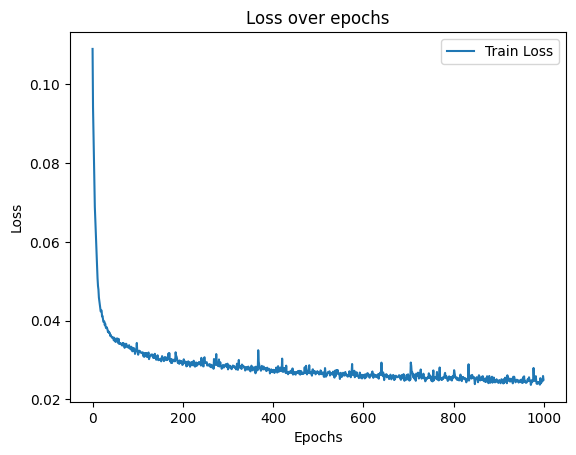

In [19]:
import importlib
import utils as ut
importlib.reload(mod)
importlib.reload(loss)
importlib.reload(ut)

encodeur_noisy = mod.Sequentiel(
    mod.Linear(len(alphabet) * 5, 50, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(50, 15, init=ml.xavier_init),
    mod.TanH()
)

decodeur_noisy = mod.Sequentiel(
    mod.Linear(15, 50, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(50, len(alphabet) * 5, init=ml.xavier_init),
    mod.Sigmoide()
)


autoencoder = mod.Sequentiel(encodeur_noisy, decodeur_noisy)

train_dataset_noisy, val_dataset_noisy, test_dataset_noisy = ut.get_dataset_split(train_vectors, train_vectors, test_size=0.15, val_size=0.15, batch_size=16)
train_dataset_noisy.set_noise_function(lambda x: add_noise_to_batch(x, noise_level=0.1))
test_dataset_noisy.set_noise_function(lambda x: add_noise_to_batch(x, noise_level=0.1))
loss_function = loss.BinaryCrossEntropyLoss()
trainer = ut.Trainer(autoencoder, loss_function, ut.Optimizer, train_dataset_noisy, val_dataset_noisy, test_dataset_noisy, epochs=1000, lr=0.1)


train_loss, _ = trainer.train(verbose=True, verbose_step=100, valid_epoch=100)
print(trainer.test([ut.LossMetric(loss_function)]))

plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [20]:
len(train_vectors)

3409

In [21]:
trainer.test_dataset.set_noise_function(lambda x: add_noise_to_batch(x, noise_level=0))
print(trainer.test([ut.LossMetric(loss_function)]))

Testing BinaryCrossEntropyLoss (Loss)
Test  BinaryCrossEntropyLoss (Loss): 0.0163
None


In [22]:
def count_identical_words(dataset, alphabet, autoencoder, encode_decode_word_func=encode_decode_word, get_word_from_vector_func=get_word_from_vector):
    count = 0
    total_words = 0
    for i in range(len(dataset)*dataset.batch_size):
        try:
            word = get_word_from_vector_func(dataset.y[i], alphabet)
            if word == encode_decode_word_func(word, autoencoder, alphabet):
                count += 1
            total_words += 1
        except Exception as e:
            return count, total_words
    return count, total_words

In [23]:
count, total_words = count_identical_words(trainer.train_dataset, alphabet, autoencoder_classic)
print(f"Identical words: {count}/{total_words} ({(count/total_words)*100:.2f}%)")
count, total_words = count_identical_words(test_dataset, alphabet, autoencoder_classic)
print(f"Identical words: {count}/{total_words} ({(count/total_words)*100:.2f}%)")

count, total_words = count_identical_words(train_dataset_noisy, alphabet, autoencoder)
print(f"Identical words: {count}/{total_words} ({(count/total_words)*100:.2f}%)")
count, total_words = count_identical_words(test_dataset_noisy, alphabet, autoencoder)
print(f"Identical words: {count}/{total_words} ({(count/total_words)*100:.2f}%)")


Identical words: 1151/2386 (48.24%)
Identical words: 185/512 (36.13%)
Identical words: 2052/2386 (86.00%)
Identical words: 346/512 (67.58%)


In [24]:
train_data['encoded'] = train_data['ortho'].apply(lambda x: encode_word(x, encodeur_noisy, alphabet)).copy()

In [25]:
train_data_genre = train_data[(train_data['genre'] == 'm') | (train_data['genre'] == 'f')]
train_data_genre = train_data_genre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre['vector'].values)
y = train_data_genre['genre'].values
y = np.where(y == 'm', 1, 0)
model = predict_logreg(X, y)
X = np.vstack(train_data_genre['encoded'].values)
model = predict_logreg(X, y)


Accuracy: 88.64%
F1 Score: 0.89
[[0.87179487 0.12820513]
 [0.10670732 0.89329268]]
Accuracy: 82.23%
F1 Score: 0.82
[[0.67948718 0.32051282]
 [0.1097561  0.8902439 ]]


In [26]:
train_data_pos = train_data.drop_duplicates(subset='ortho')
X = np.vstack(train_data_pos['vector'].values)
y = train_data_pos['cgram'].values
model = predict_logreg(X, y)
X = np.vstack(train_data_pos['encoded'].values)
model = predict_logreg(X, y)

Accuracy: 68.04%
F1 Score: 0.64
[[0.09615385 0.         0.         0.         0.         0.63461538
  0.         0.         0.         0.26923077]
 [0.5        0.         0.         0.         0.         0.5
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.85714286
  0.         0.         0.         0.14285714]
 [0.125      0.         0.         0.         0.         0.375
  0.         0.         0.         0.5       ]
 [0.04333333 0.         0.         0.         0.         0.82666667
  0.         0.         0.         0.13      ]
 [0.         0.         0.         0.         0.         0.66666667
  0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0. 

In [27]:
train_data_nombre = train_data[(train_data['nombre'] == 'p') | (train_data['nombre'] == 's')]
train_data_nombre = train_data_nombre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_nombre['vector'].values)
y = train_data_nombre['nombre'].values
y = np.where(y == 'p', 1, 0)
model = predict_logreg(X, y)
X = np.vstack(train_data_nombre['encoded'].values)
model = predict_logreg(X, y)

Accuracy: 100.00%
F1 Score: 1.00
[[1. 0.]
 [0. 1.]]
Accuracy: 98.20%
F1 Score: 0.98
[[1.    0.   ]
 [0.075 0.925]]


In [30]:
encode_decode_word('tuile', autoencoder, alphabet)

'tuile'

In [31]:
def pad_vectorize_word(word, alphabet, max_length):
    vocab_size = len(alphabet)
    vector = np.zeros((max_length, vocab_size), dtype=int)

    for i, letter in enumerate(word):
        if letter in alphabet:
            letter_index = alphabet.index(letter)
            vector[i, letter_index] = 1
        elif letter == '_':
            vector[i, :] = 0
        else:
            raise ValueError(f"Lettre inconnue : {letter}")
    
    return vector.flatten()



def pad_vectorize_data(data, alphabet, max_length):
    vectors = []
    for word in data['ortho'].drop_duplicates():
        vectors.append(pad_vectorize_word(word, alphabet, max_length))
    return np.array(vectors)

def get_word_from_padded_vector(vector, alphabet):
    vocab_size = len(alphabet)
    word_length = vector.shape[0] // vocab_size

    word = ''
    for i in range(word_length):
        one_hot = vector[i * vocab_size:(i + 1) * vocab_size]
        if one_hot.sum() == 0:
            word += '_'
        else:
            letter_index = np.argmax(one_hot)
            word += alphabet[letter_index]
    # Remove padding characters from the end of the word
    word = word.rstrip('_')
    return word

vec = pad_vectorize_word('tab_l', alphabet, 10)
print(get_word_from_padded_vector(vec, alphabet))

tab_l


In [33]:
import numpy as np

def add_mask_to_batch(batch, alphabet_size=39, noise_level=0.2):
    """
    Masque aléatoirement un certain pourcentage de lettres non masquées
    dans un batch de mots one-hot encodés.

    Paramètres :
    - batch : np.array de forme (batch_size, alphabet_size * word_len)
    - alphabet_size : nombre de lettres possibles (par défaut 39)
    - noise_level : proportion de lettres non masquées à masquer

    Retour :
    - np.array de même forme que batch avec certaines lettres masquées
    """
    batch_noisy = batch.copy()
    batch_size, total_length = batch.shape
    word_len = total_length // alphabet_size

    # Reshape pour accéder lettre par lettre
    batch_reshaped = batch_noisy.reshape(batch_size, word_len, alphabet_size)

    # Masque des lettres non nulles (non déjà masquées)
    letter_mask = (batch_reshaped.sum(axis=2) != 0)
    total_unmasked = letter_mask.sum()
    num_to_mask = int(noise_level * total_unmasked)

    # Indices des lettres non masquées
    unmasked_indices = np.argwhere(letter_mask)

    # Sélection aléatoire d'indices à masquer
    chosen_indices = unmasked_indices[np.random.choice(len(unmasked_indices), num_to_mask, replace=False)]

    # Appliquer le masquage (remplacement par un vecteur nul)
    for i, j in chosen_indices:
        batch_reshaped[i, j] = np.zeros(alphabet_size)

    # Reformer le batch initial
    return batch_reshaped.reshape(batch_size, total_length)

vecs = []
vecs.append(pad_vectorize_word('table', alphabet, 10))
vecs.append(pad_vectorize_word('grain', alphabet, 10))
vecs.append(pad_vectorize_word('cuirasse', alphabet, 10))

masked_batch = add_mask_to_batch(np.array(vecs), alphabet_size=len(alphabet), noise_level=0.2)

for i in range(masked_batch.shape[0]):
    print(get_word_from_padded_vector(masked_batch[i], alphabet))
    print(get_word_from_padded_vector(vecs[i], alphabet))


tabl
table
gra_n
grain
cu_rasse
cuirasse


Epoch 100/1000, Loss: 0.0256
Validation Loss: 0.0264
Epoch 200/1000, Loss: 0.0234
Validation Loss: 0.0266
Epoch 300/1000, Loss: 0.0216
Validation Loss: 0.0247
Epoch 400/1000, Loss: 0.0204
Validation Loss: 0.0220
Epoch 500/1000, Loss: 0.0205
Validation Loss: 0.0218
Epoch 600/1000, Loss: 0.0193
Validation Loss: 0.0213
Epoch 700/1000, Loss: 0.0189
Validation Loss: 0.0223
Epoch 800/1000, Loss: 0.0187
Validation Loss: 0.0204
Epoch 900/1000, Loss: 0.0187
Validation Loss: 0.0209
Epoch 1000/1000, Loss: 0.0178
Validation Loss: 0.0207
Testing BinaryCrossEntropyLoss (Loss)
Test  BinaryCrossEntropyLoss (Loss): 0.0201
None


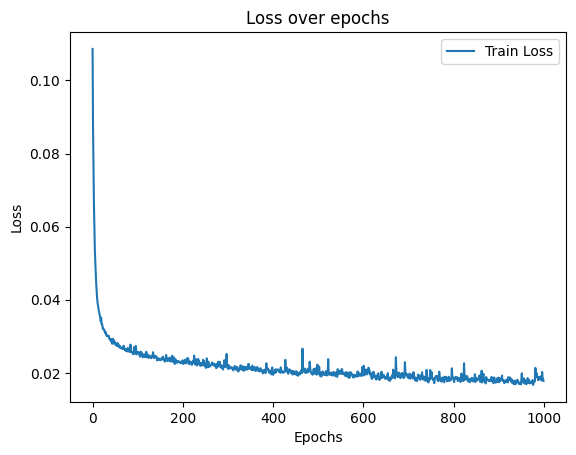

In [34]:
import importlib
import utils as ut
importlib.reload(mod)
importlib.reload(loss)
importlib.reload(ut)

encodeur_masked_fix = mod.Sequentiel(
    mod.Linear(len(alphabet) * 5, 70, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(70, 15, init=ml.xavier_init),
    mod.TanH()
)

decodeur_masked_fix = mod.Sequentiel(
    mod.Linear(15, 70, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(70, len(alphabet) * 5, init=ml.xavier_init),
    mod.Sigmoide()
)


autoencoder_masked = mod.Sequentiel(encodeur_masked_fix, decodeur_masked_fix)

train_dataset, val_dataset, test_dataset = ut.get_dataset_split(train_vectors, train_vectors, test_size=0.15, val_size=0.15, batch_size=16)
train_dataset.set_noise_function(lambda x: add_mask_to_batch(x, noise_level=0.1))
loss_function = loss.BinaryCrossEntropyLoss()
trainer = ut.Trainer(autoencoder_masked, loss_function, ut.Optimizer, train_dataset, val_dataset, test_dataset, epochs=1000, lr=0.11)


train_loss, _ = trainer.train(verbose=True, verbose_step=100, valid_epoch=100)
print(trainer.test([ut.LossMetric(loss_function)]))

plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [35]:
def encode_padded_word(word, encodeur, alphabet, max_length):
    vector = pad_vectorize_word(word, alphabet, max_length)
    vector = vector.reshape(1, -1)
    encoded_vector = encodeur.forward(vector)
    return encoded_vector


def encode_decode_padded_word(word, autoencoder, alphabet, max_length=5):
    vector = pad_vectorize_word(word, alphabet, max_length)
    vector = vector.reshape(1, -1)
    decoded_word = autoencoder.forward(vector)
    decoded_word = get_word_from_padded_vector(decoded_word[0], alphabet)
    return decoded_word

encode_decode_padded_word('ba_l_', autoencoder_masked, alphabet)

'balle'

In [36]:
train_data['encoded'] = train_data['ortho'].apply(lambda x: encode_padded_word(x, encodeur_masked_fix, alphabet, 5)).copy()

In [37]:
train_data[(train_data['ortho'].str.startswith('b')) & (train_data['ortho'].str.endswith('lle'))].sort_values(by='freqlivres', ascending=False)

,ortho,cgram,genre,nombre,nblettres,freqlivres,vector,encoded
14071,belle,ADJ,f,s,5,223.65,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.1898999269823461, -0.9562657639027203, -0..."
12792,balle,NOM,f,s,5,44.73,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.25663694483703164, -0.9793551647036718, -0..."
14738,bille,NOM,f,s,5,8.58,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.4683485417868544, -0.9865818134645683, -0...."
18539,bulle,NOM,f,s,5,6.62,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.3364214484379771, -0.9714301405595472, -0...."


In [90]:
from sklearn.metrics.pairwise import euclidean_distances

v = encode_padded_word('q____', encodeur_masked_fix, alphabet, 5)
X_vec = np.vstack(train_data['encoded'].values)
X_ortho = np.vstack(train_data['ortho'].values)

distances = euclidean_distances(X_vec, v.reshape(1,-1)).flatten()
closest_indices = np.argsort(distances)[:10]
closest_words = X_ortho[closest_indices]
print(closest_words)

[['aimée']
 ['aimée']
 ['armée']
 ['armée']
 ['armée']
 ['aimés']
 ['aimés']
 ['armés']
 ['armés']
 ['fumée']]


In [94]:
count, total_words = count_identical_words(trainer.test_dataset, alphabet, autoencoder_masked, encode_decode_padded_word, get_word_from_padded_vector)
print(f"Identical words: {count}/{total_words} ({(count/total_words)*100:.2f}%)")

Identical words: 314/512 (61.33%)


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

encoded_matrix = np.vstack(train_data['encoded'].values)
model = LogisticRegression(max_iter=1000, random_state=42)
train_data_genre = train_data[(train_data['genre'] == 'm') | (train_data['genre'] == 'f')]
train_data_genre = train_data_genre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre['encoded'].values)
y = train_data_genre['genre'].values
y = np.where(y == 'm', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
print(confusion_matrix(y_test, y_pred, normalize='true'))

Accuracy: 81.62%
F1 Score: 0.82
[[0.69736842 0.30263158]
 [0.13119534 0.86880466]]


In [107]:
masculine_with_e = np.vstack(train_data[(train_data['genre'] == 'm') & (train_data['ortho'].str.endswith('e'))]['encoded'].values)
y_pred = model.predict(masculine_with_e)
accuracy = accuracy_score([1] * len(masculine_with_e), y_pred)
print(f"Accuracy for masculine words ending with 'e': {accuracy * 100:.2f}%")
feminine_without_e = np.vstack(train_data[(train_data['genre'] == 'f') & (~train_data['ortho'].str.endswith('e'))]['encoded'].values)
y_pred = model.predict(feminine_without_e)
accuracy = accuracy_score([0] * len(feminine_without_e), y_pred)
print(f"Accuracy for feminine words not ending with 'e': {accuracy * 100:.2f}%")
obvious_gender = train_data_genre[((train_data_genre['genre'] == 'm') & (~train_data_genre['ortho'].str.endswith('e'))) | ((train_data_genre['genre'] == 'f') & (train_data_genre['ortho'].str.endswith('e')))].copy()
X_obvious = np.vstack(obvious_gender['encoded'].values)
y_pred = model.predict(X_obvious)
y_true = obvious_gender['genre'].values
y_true = np.where(y_true == 'm', 1, 0)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for obvious cases: {accuracy * 100:.2f}%")


Accuracy for masculine words ending with 'e': 20.12%
Accuracy for feminine words not ending with 'e': 3.04%
Accuracy for obvious cases: 91.23%


In [108]:
encoded_matrix = np.vstack(train_data['encoded'].values)
model = LogisticRegression(max_iter=1000, random_state=42)
train_data_genre = train_data[(train_data['nombre'] == 's') | (train_data['nombre'] == 'p')]
train_data_genre = train_data_genre.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre['encoded'].values)
y = train_data_genre['nombre'].values
y = np.where(y == 'p', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
print(confusion_matrix(y_test, y_pred, normalize='true'))

Accuracy: 96.44%
F1 Score: 0.96
[[0.98958333 0.01041667]
 [0.11570248 0.88429752]]


In [115]:
difficult_words = train_data[((train_data['nombre'] == 's') & (train_data['ortho'].str.endswith('s'))) | ((train_data['nombre'] == 'p') & (~train_data['ortho'].str.endswith('s')))].copy()
difficult_words_x = np.vstack(difficult_words['encoded'].values)
difficult_words_y = difficult_words['nombre'].values
difficult_words_y = np.where(difficult_words_y == 'p', 1, 0)
y_pred = model.predict(difficult_words_x)
accuracy = accuracy_score(difficult_words_y, y_pred)
print(f"Accuracy for difficult words: {accuracy * 100:.2f}%")

Accuracy for difficult words: 0.00%


In [116]:
difficult_words

,ortho,cgram,genre,nombre,nblettres,freqlivres,encoded
11700,aveux,NOM,m,p,5,8.11,"[[0.991427956648351, 0.9999583236767057, -0.88..."
12101,aïeux,NOM,m,p,5,2.09,"[[0.9845452967752548, 0.9999122039829959, -0.9..."
13991,beaux,ADJ,m,p,5,63.78,"[[0.7548200499933058, 0.9999962853120148, -0.9..."
14374,biais,ADJ,m,s,5,0.41,"[[0.9012555887763, 0.998533025282306, -0.90083..."
20339,camus,ADJ,m,s,5,0.54,"[[0.7513811541858506, 0.9970757125863228, -0.7..."
24426,choux,NOM,m,p,5,7.64,"[[0.24216410147512002, 0.999998985564886, -0.8..."
24843,cieux,NOM,m,p,5,4.93,"[[0.9372680381327265, 0.9999939567281405, -0.9..."
36405,dieux,NOM,m,p,5,27.97,"[[0.9808451690939556, 0.9998020971033243, -0.9..."
75125,jésus,NOM,m,s,5,0.88,"[[0.995995787711841, 0.6050223486764938, 0.247..."
76909,lieux,NOM,m,p,5,54.12,"[[0.9604778320179159, 0.9997513278433656, -0.9..."


In [128]:
quant = data['freqlivres'].quantile(0.62)
print(quant)
train_data_padded = data[(data['nblettres'] <= 10) & (data['freqlivres'] >= quant)]
train_data_padded.sort_values(by='freqlivres', ascending=False)

0.41


,ortho,cgram,genre,nombre,nblettres,freqlivres
35278,de,PRE,NaN,NaN,2,38928.92
75471,la,ART:def,f,s,2,23633.92
52787,et,CON,NaN,NaN,2,20879.73
137701,à,PRE,NaN,NaN,1,19209.05
76448,le,ART:def,m,s,2,18310.95
...,...,...,...,...,...,...
86728,nasillards,ADJ,m,p,10,0.41
86741,natales,ADJ,f,p,7,0.41
86747,natif,NOM,m,s,5,0.41
40516,décidions,VER,NaN,NaN,9,0.41


In [129]:
alphabet_pad = get_alphabet(train_data_padded)
print(alphabet_pad)
print(len(alphabet_pad))

[' ', "'", '-', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ö', 'ù', 'û', 'ü']
44


In [167]:
train_data_padded = train_data_padded.drop_duplicates(subset=['ortho'])
train_vectors_padded = pad_vectorize_data(train_data_padded, alphabet_pad, 10)
train_data_padded['vector'] = train_vectors_padded.tolist()
print(train_vectors_padded.shape)
print(get_word_from_padded_vector(train_vectors_padded[10], alphabet_pad))

(41689, 440)
abandon


C:\Users\celva\AppData\Local\Temp\ipykernel_19680\731677145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_padded['vector'] = train_vectors_padded.tolist()


In [147]:
def add_noise_to_pad_batch(batch, alphabet_size=39, noise_level=0.2):
    """
    Masque aléatoirement un certain pourcentage de lettres non masquées
    dans un batch de mots one-hot encodés.

    Paramètres :
    - batch : np.array de forme (batch_size, alphabet_size * word_len)
    - alphabet_size : nombre de lettres possibles (par défaut 39)
    - noise_level : proportion de lettres non masquées à masquer

    Retour :
    - np.array de même forme que batch avec certaines lettres masquées
    """
    batch_noisy = batch.copy()
    batch_size, total_length = batch.shape
    word_len = total_length // alphabet_size

    # Reshape pour accéder lettre par lettre
    batch_reshaped = batch_noisy.reshape(batch_size, word_len, alphabet_size)

    # Masque des lettres non nulles (non déjà masquées)
    letter_mask = (batch_reshaped.sum(axis=2) != 0)
    total_unmasked = letter_mask.sum()
    num_to_mask = int(noise_level * total_unmasked)

    # Indices des lettres non masquées
    unmasked_indices = np.argwhere(letter_mask)

    # Sélection aléatoire d'indices à bruiter
    chosen_indices = unmasked_indices[np.random.choice(len(unmasked_indices), num_to_mask, replace=False)]

    # Appliquer le masquage (remplacement par un vecteur qui encode une lettre aléatoire)
    for i, j in chosen_indices:
        random_letter = np.random.randint(alphabet_size)
        batch_reshaped[i, j] = np.zeros(alphabet_size)
        batch_reshaped[i, j][random_letter] = 1.0
    # Reformer le batch initial
    return batch_reshaped.reshape(batch_size, total_length)

vecs = []
vecs.append(pad_vectorize_word('table', alphabet, 10))
vecs.append(pad_vectorize_word('grain', alphabet, 10))
vecs.append(pad_vectorize_word('cuirasse', alphabet, 10))

masked_batch = add_noise_to_pad_batch(np.array(vecs), alphabet_size=len(alphabet), noise_level=0.2)

for i in range(masked_batch.shape[0]):
    print(get_word_from_padded_vector(masked_batch[i], alphabet))
    print(get_word_from_padded_vector(vecs[i], alphabet))

table
table
graio
grain
cufrassg
cuirasse


Epoch 10/150, Loss: 0.0412
Validation Loss: 0.0370
Epoch 20/150, Loss: 0.0335
Validation Loss: 0.0287
Epoch 30/150, Loss: 0.0312
Validation Loss: 0.0261
Epoch 40/150, Loss: 0.0298
Validation Loss: 0.0245
Epoch 50/150, Loss: 0.0287
Validation Loss: 0.0232
Epoch 60/150, Loss: 0.0279
Validation Loss: 0.0221
Epoch 70/150, Loss: 0.0271
Validation Loss: 0.0212
Epoch 80/150, Loss: 0.0266
Validation Loss: 0.0205
Epoch 90/150, Loss: 0.0261
Validation Loss: 0.0198
Epoch 100/150, Loss: 0.0256
Validation Loss: 0.0192
Epoch 110/150, Loss: 0.0252
Validation Loss: 0.0186
Epoch 120/150, Loss: 0.0247
Validation Loss: 0.0181
Epoch 130/150, Loss: 0.0243
Validation Loss: 0.0175
Epoch 140/150, Loss: 0.0239
Validation Loss: 0.0170
Epoch 150/150, Loss: 0.0236
Validation Loss: 0.0166
Testing BinaryCrossEntropyLoss (Loss)
Test  BinaryCrossEntropyLoss (Loss): 0.0167
None


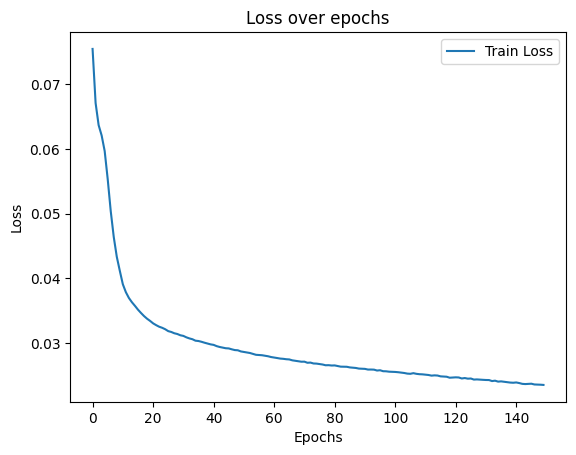

In [ ]:
encodeur_masked = mod.Sequentiel(
    mod.Linear(len(alphabet_pad) * 10, 100, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(100, 15, init=ml.xavier_init),
    mod.TanH()
)

decodeur_masked = mod.Sequentiel(
    mod.Linear(15, 100, init=ml.xavier_init),
    mod.TanH(),
    mod.Linear(100, len(alphabet_pad) * 10, init=ml.xavier_init),
    mod.Sigmoide()
)


autoencoder_masked = mod.Sequentiel(encodeur_masked, decodeur_masked)

train_dataset, val_dataset, test_dataset = ut.get_dataset_split(train_vectors_padded, train_vectors_padded, test_size=0.15, val_size=0.15, batch_size=128)
train_dataset.set_noise_function(lambda x: add_noise_to_pad_batch(x, alphabet_size=44, noise_level=0.1))
loss_function = loss.BinaryCrossEntropyLoss()
trainer = ut.Trainer(autoencoder_masked, loss_function, ut.Optimizer, train_dataset, val_dataset, test_dataset, epochs=150, lr=0.09)


train_loss, _ = trainer.train(verbose=True, verbose_step=10, valid_epoch=10)
print(trainer.test([ut.LossMetric(loss_function)]))

plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [165]:
encode_decode_padded_word('chat', autoencoder_masked, alphabet_pad, 10)

'chatreszzi'

In [168]:
model = LogisticRegression(max_iter=1000, random_state=42)
train_data_genre_padded = train_data_padded[(train_data_padded['genre'] == 'm') | (train_data_padded['genre'] == 'f')]
train_data_genre_padded = train_data_genre_padded.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre_padded['vector'].values)
y = train_data_genre_padded['genre'].values
y = np.where(y == 'm', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
print(confusion_matrix(y_test, y_pred, normalize='true'))

Accuracy: 87.45%
F1 Score: 0.87
[[0.8474026  0.1525974 ]
 [0.10562181 0.89437819]]


In [170]:
train_data_padded['encoded'] = train_data_padded['ortho'].apply(lambda x: encode_padded_word(x, encodeur_masked, alphabet_pad, 10)).copy()

C:\Users\celva\AppData\Local\Temp\ipykernel_19680\608064905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_padded['encoded'] = train_data_padded['ortho'].apply(lambda x: encode_padded_word(x, encodeur_masked, alphabet_pad, 10)).copy()


In [171]:
encoded_matrix = np.vstack(train_data_padded['encoded'].values)
model = LogisticRegression(max_iter=1000, random_state=42)
train_data_genre_padded = train_data_padded[(train_data_padded['genre'] == 'm') | (train_data_padded['genre'] == 'f')]
train_data_genre_padded = train_data_genre_padded.drop_duplicates(subset='ortho')
X = np.vstack(train_data_genre_padded['encoded'].values)
y = train_data_genre_padded['genre'].values
y = np.where(y == 'm', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
print(confusion_matrix(y_test, y_pred, normalize='true'))

Accuracy: 59.10%
F1 Score: 0.52
[[0.15630798 0.84369202]
 [0.08960818 0.91039182]]


In [124]:
def vectorize_word(word, alphabet):
    word_length = len(word)
    vocab_size = len(alphabet)
    vector = np.zeros((word_length, vocab_size), dtype=int)

    for i, letter in enumerate(word):
        if letter in alphabet:
            letter_index = alphabet.index(letter)
            vector[i, letter_index] = 1
        else:
            raise ValueError(f"Lettre inconnue : {letter}")
    
    return vector


def vectorize_data(data, alphabet):
    vectors = []
    for word in data['ortho'].drop_duplicates():
        vectors.append(vectorize_word(word, alphabet))
    return np.array(vectors)

def get_word_from_vector(vector, alphabet):
    vocab_size = len(alphabet)
    word_length = vector.shape[0]

    word = ''
    for i in range(word_length):
        one_hot = vector[i]
        if one_hot.sum() == 0:
            word += '?'
        else:
            letter_index = np.argmax(one_hot)
            word += alphabet[letter_index]
    return word

train_vectors = vectorize_data(train_data, alphabet)
print(train_vectors.shape)
# print(train_vectors[2])
print(train_data['ortho'].drop_duplicates().iloc[2])
print(get_word_from_vector(train_vectors[2], alphabet))

(3409, 5, 39)
abcès
abcès


Epoch 10/100, Loss: 0.3615
Validation Loss: 0.3311
Epoch 20/100, Loss: 0.1116
Validation Loss: 0.1119
Epoch 30/100, Loss: 0.1513
Validation Loss: 0.1534
Epoch 40/100, Loss: 0.1892
Validation Loss: 0.1897
Epoch 50/100, Loss: 0.2112
Validation Loss: 0.2102
Epoch 60/100, Loss: 0.2191
Validation Loss: 0.2162
Epoch 70/100, Loss: 0.2196
Validation Loss: 0.2153
Epoch 80/100, Loss: 0.2231
Validation Loss: 0.2162
Epoch 90/100, Loss: 0.2115
Validation Loss: 0.2041
Epoch 100/100, Loss: 0.2290
Validation Loss: 0.2207


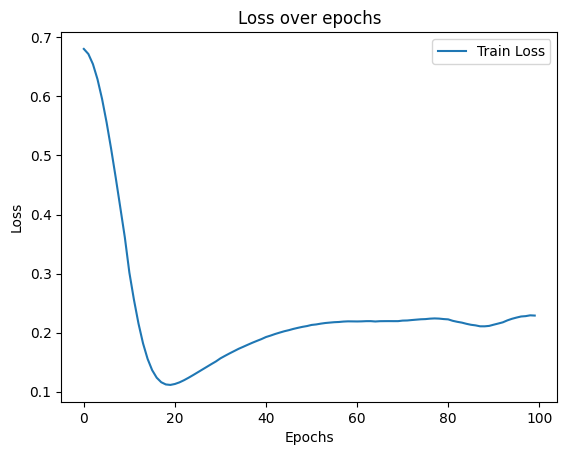

In [196]:
import importlib
import utils as ut
importlib.reload(mod)

train_dataset, val_dataset, test_dataset = ut.get_dataset_split(train_vectors, train_vectors, test_size=0.15, val_size=0.15, batch_size=64)

# # (self, word_size, alphabet_size, letter_embedding_dim, word_embedding_dim, letter_layer_size=25, word_layer_size=50, init=None):
word_encoder = mod.WordEncoder(5,39,10, 20, letter_layers=[20, 20], word_layers=[30, 30], init=ml.xavier_init)

loss_function = loss.BinaryCrossEntropyLoss()

trainer = ut.Trainer(word_encoder, loss_function, ut.Optimizer, train_dataset, val_dataset, test_dataset, epochs=100, lr=1e-6)
train_loss, _ = trainer.train(verbose=True, verbose_step=10, valid_epoch=10)

plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [181]:
# print(word_encoder.forward(train_vectors[2:4])[1])
test_vec = np.array([train_vectors[2]])
print(get_word_from_vector(word_encoder.forward(test_vec)[0], alphabet))
print(get_word_from_vector(train_vectors[2], alphabet))

abcès
abcès
